#  Homework 1 (HW1)
Deadline: February 27 at 11:59pm

Hand in: the homework must be handed in through the Moodle system. 

<span style="color:red">Provide a written answer if requested in the exercise! These questions are marked in red.</span>

---

## Exercise 1 (HW1/1)

In this exercise we will investigate income inequality and life expectancy indicators for different countries and regions. We will use data from the gapminder website (http://www.gapminder.org/data/). (50%)

**a)** Download the *countries.csv* file from Moodle and save it into a *Data* folder in the same directory as this notebook. Use the relative path to load it as a pandas DataFrame named *countries* using the read_csv() function. From Gapminder import the *Income per person (GDP/capita, PPP$ inflation-adjusted)* and *Life expentancy (years)* data. Name them *income* and *life_exp* respectively. You can read in the data without dowloading it to your computer using this code:

<code>pd.read_excel('https://docs.google.com/spreadsheets/d/1gZZ28UiWCVue-tFHMEVOvSO58x7x-w20E23l1wZTR3E/export?format=xlsx', sheet_name='data-GDP-per-capita-in-columns')</code><br>
<br><code>pd.read_excel('https://github.com/Gapminder-Indicators/lex/raw/master/lex-by-gapminder.xlsx', sheet_name='countries_and_territories')</code><br>

**b)** Represent the distribution of income per capita (across countries) for a given year (for example: 2007) with a histogram! (Hint: use the *.hist()* function on the desired data column)

**c)** Write a function that merges the  *countries*, *income* and *life_exp* DataFrames for a given year. The year should be the function's input. (Hint: Use the *pd.merge()* function!)

**d)** Using the dataframe created in part c), present a [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) of the distribution of income per capita (across countries) for the years 1950 and 2010 grouped by region (continent). <span style="color:red">What changed in 60 years?</span>
(Hints: 1. Use the *pd.boxplot* function! 2. Use a logarithmic scale for the income axis!)

**e)** Represent the relationship between income per capita and life expectancy for a given year using a [scatter plot](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.scatter.html) based on the dataframe created in point c). <span style="color:red">What can you conclude from the plot?</span> (Hint: choose a year where there aren't many missing values!) 

## Exercise 2 (HW1/2)

The [Round University Ranking (RUR)](https://roundranking.com/ranking/world-university-rankings.html#world-2021) evaluates the performance of 867 world’s leading higher education institutions by 20 indicators grouped into 4 key areas of university activity: Teaching, Research, International Diversity, Financial Sustainability. The top 100 universities are placed in the diamond league, the next 100 in the gold league and so on... (50%)

**a)**  Using the scraping techniques covered in class, scrape the following data fields about the universities (from the website linked above): The name of the University, in which country the University is located, their score and league given by the RUR ranking. Then load the data into a Pandas DataFrame called *df* with the following column names: <font style='font-style : oblique'>University</font>, <font style='font-style : oblique'>Country</font>, <font style='font-style : oblique'>Score</font> and <font style='font-style : oblique'>League</font>. (Hints: look for the 'table' tag, find the rows of the table with the 'tr' tag, and then loop through them extracting the requested elements).

IMPORTANT: You should not re-scrape the data every time you work on the homework, because we don't want the RUR servers to get overloaded. Instead, scrape the data once and then save it to a local file on your computer (Hint: use the *pd.to_csv()* function), then load the data from this file instead of re-scraping the website.

**b)** Filter the data as follows:
- Filter out the US universities. (The analysis aims to find out which universities rank high outside the USA to help US students in choosing a study abroad program.)
- Only keep the universities in the Diamond, Gold, Silver and Bronze league.
- Sort the dataframe by score. <span style="color:red">Which are the top 5 ranking universities?</span>

**c)** Create a stacked barplot showing what portion of each country's universities are in each league. Country should be on the y axis, number of universities on the x axis, and there should be a legend with the leagues. If you have done everything as written above, then the following code snippet creates the necessary crosstable:

<code>df2 = pd.crosstab(df.Country, df.League, values=df.University, aggfunc=len)[['Bronze League', 'Silver League', 'Golden League', 'Diamond League']].fillna(0)</code><br>

- Only keep the countries, which have at least 10 universities in the DataFrame.
- Sort the countries based on how many universities they have in the DataFrame.
- The labels on the y axis should be the countries, and the x axis should indicate the number of universities in the bronze, silver, gold and diamond leagues for the given country. 

Hint: This plot can be created in a very simple way by using the .plot.barh(stacked=True) method on the crosstable created in the code snippit above.

The barplot should look something like this:

<div>
<img src="https://media.licdn.com/dms/image/C4D22AQFjbmzYD8jo2w/feedshare-shrink_800/0/1676140611085?e=1678924800&v=beta&t=E5Xlq-u78bQVFzi-v5ye8Pyt4SazJi7cIFuAJaNqI1s" width="400"/>
</div>

**d)** In the last exercise you have to create a word cloud from the Mission Statements of the top Universities. We have already scraped these statements for you. You can find the scraped data [here](https://math.bme.hu/~pinterj/BevAdat1/Adatok/wordcloud.txt)! <br>
- Load the text data from this site into a string variable! (Hint: You can load the data with *urlopen* as shown in Notebook1)
- Omit the word "university" from the data!
- Create a word cloud, then <span style="color:red">describe what you see in 2-3 sentences!</span>

(Hint: You can find more information on how to create a Word Cloud at https://www.datacamp.com/community/tutorials/wordcloud-python)

In [166]:
#Problem 1

In [212]:
!pip install pandas

In [213]:
!pip install matplotlib

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_excel('/Users/mac/Documents/Data_Science/hw01/countries.xlsx', sheet_name='countries')
df2 = pd.read_excel('/Users/mac/Documents/Data_Science/hw01/income.xlsx', sheet_name='data-GDP-per-capita-in-columns')
df3 = pd.read_excel('/Users/mac/Documents/Data_Science/hw01/life_expectancy.xlsx', sheet_name='countries_and_territories')

In [216]:
#df1 = df1.sort_values('country') #Countries

In [217]:
df1

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA
...,...,...
189,Paraguay,SOUTH AMERICA
190,Peru,SOUTH AMERICA
191,Suriname,SOUTH AMERICA
192,Uruguay,SOUTH AMERICA


In [218]:
df2 #Income per Person(GDP/capita)

,geo,Country Name,1800,1801,1802,1803,1804,1805,1806,1807,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,afg,Afghanistan,674.0,674.0,674.0,674.0,674.0,674.0,674.0,674.0,...,2880.0,2942.0,3004.0,3068.0,3133.0,3200.0,3267.0,3337.0,3408.0,3480.0
1,alb,Albania,746.0,746.0,746.0,746.0,746.0,747.0,747.0,747.0,...,24470.0,24990.0,25520.0,26062.0,26615.0,27181.0,27758.0,28347.0,28949.0,29563.0
2,dza,Algeria,788.0,788.0,788.0,788.0,788.0,788.0,788.0,788.0,...,13237.0,13518.0,13805.0,14098.0,14398.0,14703.0,15015.0,15334.0,15660.0,15992.0
3,and,Andorra,1338.0,1341.0,1343.0,1346.0,1348.0,1351.0,1353.0,1355.0,...,108493.0,110796.0,113148.0,115551.0,118004.0,120509.0,123067.0,125680.0,128348.0,131073.0
4,ago,Angola,691.0,693.0,697.0,700.0,702.0,705.0,709.0,712.0,...,8044.0,8215.0,8389.0,8567.0,8749.0,8935.0,9124.0,9318.0,9516.0,9718.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,africa,Africa,721.0,722.0,722.0,723.0,723.0,723.0,723.0,727.0,...,6629.0,6751.0,6875.0,7001.0,7130.0,7262.0,7396.0,7533.0,7672.0,7815.0
200,asia,Asia,1103.0,1101.0,1098.0,1095.0,1092.0,1088.0,1085.0,1082.0,...,23366.0,23812.0,24267.0,24731.0,25205.0,25687.0,26180.0,26682.0,27195.0,27718.0
201,europe,Europe,1825.0,1821.0,1834.0,1834.0,1845.0,1843.0,1847.0,1855.0,...,55431.0,56632.0,57858.0,59110.0,60389.0,61695.0,63029.0,64392.0,65784.0,67207.0
202,americas,The Americas,1639.0,1650.0,1660.0,1646.0,1642.0,1658.0,1672.0,1676.0,...,44527.0,45475.0,46445.0,47437.0,48452.0,49491.0,50555.0,51644.0,52759.0,53901.0


In [219]:
df3 #Life Expectancy

,geo.name,indicator.name,geo,indicator,1800,1801,1802,1803,1804,1805,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Abkhazia,Life expectancy,abkh,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Life expectancy,afg,lex,28.21,28.20,28.19,28.18,28.17,28.16,...,69.95,70.07,70.19,70.31,70.44,70.57,70.70,70.83,70.96,71.09
2,Akrotiri and Dhekelia,Life expectancy,akr_a_dhe,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,Life expectancy,alb,lex,35.40,35.40,35.40,35.40,35.40,35.40,...,88.29,88.40,88.51,88.62,88.73,88.84,88.95,89.06,89.17,89.28
4,Algeria,Life expectancy,dza,lex,28.82,28.82,28.82,28.82,28.82,28.82,...,89.37,89.49,89.61,89.73,89.85,89.97,90.09,90.21,90.33,90.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Northern Marianas,Life expectancy,n_marianas,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,South Georgia and the South Sandwich Islands,Life expectancy,sgero_a_ssandw,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,US Minor Outlying Islands,Life expectancy,usa_minor_out_isl,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Virgin Islands,Life expectancy,virg_isl,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Income per Person')

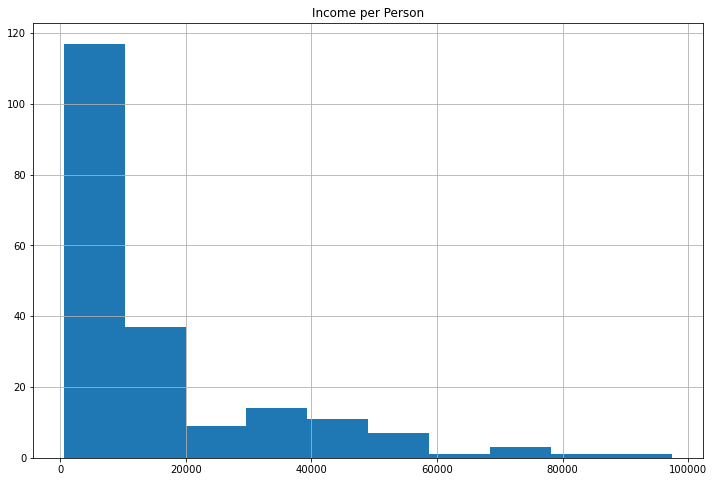

In [220]:
df2[2001].hist(figsize=(12,8))
plt.title('Income per Person')

In [221]:
df2.head()

,geo,Country Name,1800,1801,1802,1803,1804,1805,1806,1807,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,afg,Afghanistan,674.0,674.0,674.0,674.0,674.0,674.0,674.0,674.0,...,2880.0,2942.0,3004.0,3068.0,3133.0,3200.0,3267.0,3337.0,3408.0,3480.0
1,alb,Albania,746.0,746.0,746.0,746.0,746.0,747.0,747.0,747.0,...,24470.0,24990.0,25520.0,26062.0,26615.0,27181.0,27758.0,28347.0,28949.0,29563.0
2,dza,Algeria,788.0,788.0,788.0,788.0,788.0,788.0,788.0,788.0,...,13237.0,13518.0,13805.0,14098.0,14398.0,14703.0,15015.0,15334.0,15660.0,15992.0
3,and,Andorra,1338.0,1341.0,1343.0,1346.0,1348.0,1351.0,1353.0,1355.0,...,108493.0,110796.0,113148.0,115551.0,118004.0,120509.0,123067.0,125680.0,128348.0,131073.0
4,ago,Angola,691.0,693.0,697.0,700.0,702.0,705.0,709.0,712.0,...,8044.0,8215.0,8389.0,8567.0,8749.0,8935.0,9124.0,9318.0,9516.0,9718.0


In [222]:
df3.head()

,geo.name,indicator.name,geo,indicator,1800,1801,1802,1803,1804,1805,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Abkhazia,Life expectancy,abkh,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Life expectancy,afg,lex,28.21,28.20,28.19,28.18,28.17,28.16,...,69.95,70.07,70.19,70.31,70.44,70.57,70.70,70.83,70.96,71.09
2,Akrotiri and Dhekelia,Life expectancy,akr_a_dhe,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,Life expectancy,alb,lex,35.40,35.40,35.40,35.40,35.40,35.40,...,88.29,88.40,88.51,88.62,88.73,88.84,88.95,89.06,89.17,89.28
4,Algeria,Life expectancy,dza,lex,28.82,28.82,28.82,28.82,28.82,28.82,...,89.37,89.49,89.61,89.73,89.85,89.97,90.09,90.21,90.33,90.45


In [223]:
def merge_by_year(year):
    income_year = df2[["Country Name", year]]
    income_year = income_year.rename(columns = {year: "Income"+str(year)})
    
    life_expectancy_year = df3[["geo.name", year]]
    life_expectancy_year = life_expectancy_year.rename(columns = {year: "Life_Expectancy"+str(year), "geo.name": "Country Name"})
    
    final_df = income_year.merge(life_expectancy_year, on="Country Name")
    
    final_df = final_df.rename(columns={"Country Name": "Country"})
    final_df = final_df.merge(df1, on="Country")
    
    return final_df

df_2001 = merge_by_year(2001)
df_2001.head()

,Country,Income2001,Life_Expectancy2001,Region
0,Afghanistan,563.0,51.69,ASIA
1,Albania,6462.0,74.48,EUROPE
2,Algeria,8855.0,74.13,AFRICA
3,Andorra,35547.0,82.05,EUROPE
4,Angola,2487.0,53.64,AFRICA


In [224]:
df_1950 = merge_by_year(1950)
df_2010 = merge_by_year(2010)

In [234]:
grouped_df_1950 = df_1950.groupby('Region')
grouped_df_1950.head()

,Country,Income1950,Life_Expectancy1950,Region
0,Afghanistan,1330.0,31.98,ASIA
1,Albania,1836.0,54.47,EUROPE
2,Algeria,3869.0,46.85,AFRICA
3,Andorra,7808.0,NaN,EUROPE
4,Angola,1929.0,36.60,AFRICA
5,Antigua and Barbuda,3368.0,58.20,NORTH AMERICA
6,Argentina,9143.0,60.62,SOUTH AMERICA
7,Armenia,4080.0,58.66,EUROPE
8,Australia,13589.0,69.33,OCEANIA
9,Austria,6794.0,64.83,EUROPE


In [235]:
grouped_df_2010 = df_2010.groupby('Region')
grouped_df_2010.head()

,Country,Income2010,Life_Expectancy2010,Region
0,Afghanistan,1957.0,56.20,ASIA
1,Albania,10784.0,76.31,EUROPE
2,Algeria,10971.0,76.55,AFRICA
3,Andorra,43583.0,82.66,EUROPE
4,Angola,7692.0,60.08,AFRICA
5,Antigua and Barbuda,18206.0,76.85,NORTH AMERICA
6,Argentina,23521.0,75.82,SOUTH AMERICA
7,Armenia,9286.0,73.34,EUROPE
8,Australia,45131.0,81.98,OCEANIA
9,Austria,51934.0,80.50,EUROPE


In [238]:
df_1950 = df_1950.rename(columns={'Income1950': 'Income'})
df_2010 = df_2010.rename(columns={'Income2010': 'Income'})

In [239]:
merged_years = pd.concat([df_1950, df_2010], ignore_index=True)

In [241]:
import numpy as np
merged_years['Income'] = np.log10(merged_years['Income'])

<Figure size 576x432 with 0 Axes>

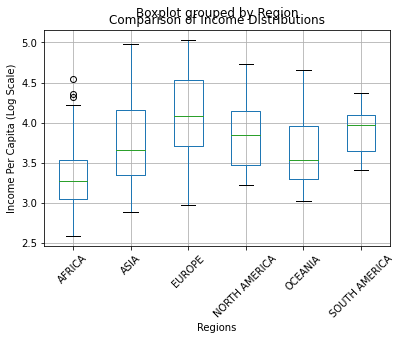

In [248]:
plt.figure(figsize=(8,6))
merged_years.boxplot(column='Income', by='Region', rot=45)

plt.title('Comparison of Income Distributions')
plt.xlabel('Regions')
plt.ylabel('Income Per Capita (Log Scale)')
plt.show()

<Figure size 576x432 with 0 Axes>

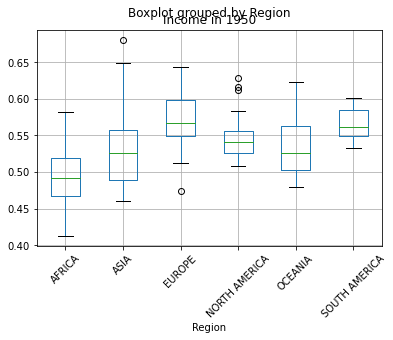

In [252]:
df_1950['Income'] = np.log10(df_1950['Income'])
plt.figure(figsize=(8,6))
df_1950.boxplot(column='Income', by='Region', rot=45)
plt.title('Income in 1950')
plt.show()

<Figure size 576x432 with 0 Axes>

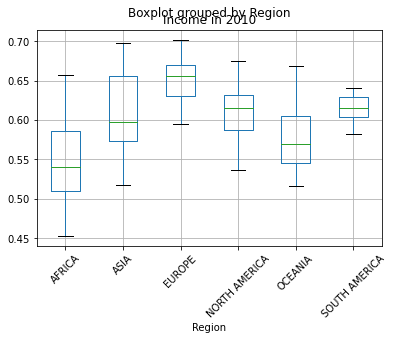

In [251]:
df_2010['Income'] = np.log10(df_2010['Income'])
plt.figure(figsize=(8,6))
df_2010.boxplot(column='Income', by='Region', rot=45)
plt.title('Income in 2010')
plt.show()

In [253]:
#In 60 years, we can see an overall increase in income per capita in all the regions.
#Even after 60 years, Europe still has the higher income per capita than any other region.
#Asia not only has a higher income per capita, but also the highest variance in income in 2010 than 1950. However the
#median has dropped for Asia in 2010.
#Oceania has a higher income per capita, but not much has changed in regards to the variance.
#North America has grown in income but also variance in income per capita
#South America has been more or less the same, however, it has shrunk in the variance and distribution of income
#Africa has a higher income per capita in 2010 and also more variance in income.

In [254]:
df_2015 = merge_by_year(2015)
df_2015.head()

,Country,Income2015,Life_Expectancy2015,Region
0,Afghanistan,2068.0,57.90,ASIA
1,Albania,11916.0,77.56,EUROPE
2,Algeria,11697.0,77.28,AFRICA
3,Andorra,52076.0,82.55,EUROPE
4,Angola,8036.0,64.00,AFRICA


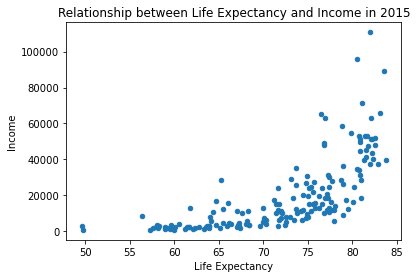

In [258]:
df_2015.plot(kind='scatter', x='Life_Expectancy2015', y='Income2015')
plt.title('Relationship between Life Expectancy and Income in 2015')
plt.xlabel('Life Expectancy')
plt.ylabel('Income')
plt.show()

In [ ]:
#From the scatter plot above, I conclude that income and life expectancy have a weak relationship in 2015, however, 
#there is still a higher chance of a longer life if incomes are higher.

In [ ]:
#Problem 2

In [348]:
!pip install selenium

In [349]:
pip install --upgrade selenium

Requirement already up-to-date: selenium in /Users/mac/opt/anaconda3/lib/python3.8/site-packages (4.8.2)
Note: you may need to restart the kernel to use updated packages.


In [511]:
from selenium import webdriver
import pandas as pd
from selenium.webdriver.common.by import By
import csv
from bs4 import BeautifulSoup
import time

In [512]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.select import Select

In [513]:
#Open the website
driver = webdriver.Chrome('/Users/mac/Downloads/chromedriver')
driver.get('https://roundranking.com/ranking/world-university-rankings.html#world-2021')

<ipython-input-513-d1441b303dae>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/mac/Downloads/chromedriver')


In [514]:
select_year = driver.find_element(By.CLASS_NAME, 'form-control')
print(select_year.text)

            2010
            2011
            2012
            2013
            2014
            2015
            2016
            2017
            2018
            2019
            2020
            2021
            2022
           


In [515]:
select_year = driver.find_element(By.CLASS_NAME, 'form-control')

time.sleep(2)
select_year.click()
time.sleep(2)

select_year = driver.find_element(By.ID, 'years')
print(select_year.text)

            2010
            2011
            2012
            2013
            2014
            2015
            2016
            2017
            2018
            2019
            2020
            2021
            2022
           


In [516]:
select_year.get_attribute('innerHTML')

'\n\t\t\t\t\t\t\t\t\t\t\t\t<option value="1">2010</option>\n\t\t\t\t\t\t\t\t\t\t\t\t<option value="2">2011</option>\n\t\t\t\t\t\t\t\t\t\t\t\t<option value="3">2012</option>\n\t\t\t\t\t\t\t\t\t\t\t\t<option value="4">2013</option>\n\t\t\t\t\t\t\t\t\t\t\t\t<option value="5">2014</option>\n\t\t\t\t\t\t\t\t\t\t\t\t<option value="6">2015</option>\n\t\t\t\t\t\t\t\t\t\t\t\t<option value="7">2016</option>\n\t\t\t\t\t\t\t\t\t\t\t\t<option value="8">2017</option>\n\t\t\t\t\t\t\t\t\t\t\t\t<option value="9">2018</option>\n\t\t\t\t\t\t\t\t\t\t\t\t<option value="10">2019</option>\n\t\t\t\t\t\t\t\t\t\t\t\t<option value="11">2020</option>\n\t\t\t\t\t\t\t\t\t\t\t\t<option value="12" selected="selected">2021</option>\n\t\t\t\t\t\t\t\t\t\t\t\t<option value="13" selected="true">2022</option>\n\t\t\t\t\t\t\t\t\t\t\t'

In [517]:
select_year_2022 = select_year.find_element(By.XPATH, '//option[@value="13"]')
print(select_year_2022.text)
select_year_2022.click()

2022


In [525]:
matches = driver.find_elements(By.TAG_NAME, 'tr')

data = []

for match in matches:
    cells = match.find_elements(By.TAG_NAME, 'td')
    if len(cells)>=5:
        university = cells[1].text
        score = cells[2].text
        country = cells[3].text
        league = cells[5].text
        data.append([university, score, country, league])
        print(university, score, country, league)
    

California Institute of Technology (Caltech) 100.000 USA Diamond League
Harvard University 98.697 USA Diamond League
Massachusetts Institute of Technology (MIT) 98.634 USA Diamond League
Stanford University 98.424 USA Diamond League
Karolinska Institute 98.414 Sweden Diamond League
ETH Zurich (Swiss Federal Institute of Technology) 96.644 Switzerland Diamond League
Columbia University 96.562 USA Diamond League
Imperial College London 96.113 UK Diamond League
University of Chicago 96.032 USA Diamond League
Johns Hopkins University 95.620 USA Diamond League
Peking University 95.409 China Diamond League
University of Oxford 95.289 UK Diamond League
University of Pennsylvania 94.745 USA Diamond League
Ecole Polytechnique Federale de Lausanne 94.733 Switzerland Diamond League
Princeton University 94.665 USA Diamond League
University of Cambridge 94.554 UK Diamond League
Yale University 94.395 USA Diamond League
Northwestern University 94.183 USA Diamond League
Washington University in St. L

Monash University 77.558 Australia Golden League
Northeastern University 77.528 USA Golden League
Katholieke Universiteit Leuven (KU Leuven) 77.269 Belgium Golden League
Newcastle University 77.180 UK Golden League
Tel Aviv University 77.178 Israel Golden League
Gwangju Institute of Science and Technology 77.174 Republic of Korea Golden League
University of Malaya 76.894 Malaysia Golden League
Cardiff University 76.792 UK Golden League
Rockefeller University 76.749 USA Golden League
University of Arizona 76.724 USA Golden League
Indian Institute of Science Education and Research, Pune 76.684 India Golden League
University of Adelaide 76.679 Australia Golden League
Autonomous University of Barcelona 76.666 Spain Golden League
Trinity College Dublin 76.519 Ireland Golden League
Humboldt University of Berlin 76.484 Germany Golden League
State University of New York, Buffalo 76.456 USA Golden League
Swedish University of Agricultural Sciences 76.430 Sweden Golden League
Sungkyunkwan Univer

Queens University 68.333 Canada Bronze League
University of Bremen 68.290 Germany Bronze League
Universite Libre de Bruxelles 68.274 Belgium Bronze League
Queensland University of Technology 68.198 Australia Bronze League
University of Otago 68.075 New Zealand Bronze League
University of South Florida 68.040 USA Bronze League
Pompeu Fabra University 68.013 Spain Bronze League
Universiti Sains Malaysia 67.932 Malaysia Bronze League
Bar-Ilan University 67.913 Israel Bronze League
Sun Yat-sen University 67.835 China Bronze League
Khalifa University 67.571 United Arab Emirates Bronze League
University of East Anglia 67.285 UK Bronze League
Indian Institute of Technology, Kanpur 67.283 India Bronze League
Oregon State University 67.245 USA Bronze League
University of Nebraska 67.239 USA Bronze League
Federal University of Rio de Janeiro 67.134 Brazil Bronze League
University of Tehran 66.913 Iran Bronze League
University of Canterbury 66.841 New Zealand Bronze League
University of Guelph 66

University of Brescia 57.812 Italy Copper League
Texas Tech University 57.670 USA Copper League
Keele University 57.499 UK Copper League
Yokohama National University 57.490 Japan Copper League
University of Valencia 57.424 Spain Copper League
University of Yamanashi 57.349 Japan Copper League
Worcester Polytechnic Institute 57.290 USA Copper League
Gifu University 57.234 Japan Copper League
University of Minho 57.223 Portugal Copper League
Stevens Institute of Technology 57.195 USA Copper League
Jamia Millia Islamia 57.150 India Copper League
The New School 57.138 USA Copper League
University of Szeged 57.030 Hungary Copper League
New Mexico State University 56.866 USA Copper League
Chongqing University 56.764 China Copper League
East China University of Science and Technology 56.749 China Copper League
University of Limerick 56.569 Ireland Copper League
West Virginia University 56.567 USA Copper League
Auckland University of Technology 56.377 New Zealand Copper League
Kyungpook Nation

Shenzhen University 48.784 China World League
Samara University 48.759 Russia World League
Thammasat University 48.699 Thailand World League
University of the Ryukyus 48.532 Japan World League
Marquette University 48.504 USA World League
University of Central Florida 48.501 USA World League
Kyiv National Economic University 48.307 Ukraine World League
Edith Cowan University 47.871 Australia World League
University of Alabama Birmingham 47.859 USA World League
University of Tabriz 47.847 Iran World League
University of Valladolid 47.794 Spain World League
Universite de Tunis El Manar 47.783 Tunisia World League
Middlesex University 47.633 UK World League
Hitotsubashi University 47.609 Japan World League
Xidian University 47.606 China World League
Lebanese American University 47.494 Lebanon World League
University of Peradeniya 47.475 Sri Lanka World League
Texas Christian University 47.354 USA World League
Donghua University 47.353 China World League
University of Seville 47.323 Spain W

Federation University Australia 38.850 Australia World League
Liaoning University 38.834 China World League
Perm National Research Polytechnic University 38.713 Russia World League
Ivane Javakhishvili Tbilisi State University 38.673 Republic of Georgia World League
Institute of Space Technology 38.590 Pakistan World League
Kharkiv National University of Radio Electronics 38.561 Ukraine World League
Moscow Pedagogical State University 38.459 Russia World League
University of Anbar 38.360 Iraq World League
Yanshan University 38.324 China World League
Herzen University 38.238 Russia World League
Izmir Institute of Technology 37.916 Turkey World League
University of Kurdistan 37.865 Iran World League
National Taipei University 37.862 Taiwan World League
Jiangsu Normal University 37.797 China World League
Moscow State University of Civil Engineering 37.775 Russia World League
National University of Ostroh Academy 37.704 Ukraine World League
London Metropolitan University 37.671 UK World Lea

Tamkang University 29.150 Taiwan World League
Azerbaijan University of Architecture and Construction 29.115 Azerbaijan World League
Lipetsk State Technical University 28.967 Russia World League
Platov South-Russian State Polytechnic University 28.826 Russia World League
ESIC Business and Marketing School 28.776 Spain World League
University of AL-Qadisiyah 28.462 Iraq World League
Western Caspian University 28.407 Azerbaijan World League
Volgograd State Technical University 28.154 Russia World League
Al-Ahliyya Amman University 28.062 Jordan World League
Pacific National University 28.016 Russia World League
University of Misan 27.976 Iraq World League
National Chiayi University 27.965 Taiwan World League
Omsk State Agrarian University 27.750 Russia World League
Novgorod State University 27.696 Russia World League
Orel State Agrarian University 27.672 Russia World League
British University in Egypt 27.662 Egypt World League
University of Tikrit 27.640 Iraq World League
Ninevah Universi

In [526]:
df_hw2 = pd.DataFrame(data, columns=['university', 'score', 'country', 'league'])

In [527]:
df_hw2.to_csv('rankings.csv')

In [528]:
print(df_hw2)

                                        university    score country  \
0     California Institute of Technology (Caltech)  100.000     USA   
1                               Harvard University   98.697     USA   
2      Massachusetts Institute of Technology (MIT)   98.634     USA   
3                              Stanford University   98.424     USA   
4                             Karolinska Institute   98.414  Sweden   
...                                            ...      ...     ...   
1015                 Al-Mansour University College    7.513    Iraq   
1016                    Altoosi University College    7.339    Iraq   
1017                   Al-Hikma University College    5.434    Iraq   
1018                University of Warith Alanbiyaa    4.644    Iraq   
1019                        Imam Al-Kadhum College    4.232    Iraq   

              league  
0     Diamond League  
1     Diamond League  
2     Diamond League  
3     Diamond League  
4     Diamond League  
...      

In [565]:
values_to_filter = ['Diamond League', 'Golden League', 'Silver League', 'Bronze League']
filtered_df = df_hw2[df_hw2['league'].isin(values_to_filter)]
print(filtered_df)

                                       university    score  country  \
0    California Institute of Technology (Caltech)  100.000      USA   
1                              Harvard University   98.697      USA   
2     Massachusetts Institute of Technology (MIT)   98.634      USA   
3                             Stanford University   98.424      USA   
4                            Karolinska Institute   98.414   Sweden   
..                                            ...      ...      ...   
389                   Central European University   61.945  Hungary   
390                    Nanjing Medical University   61.894    China   
391       Iran University of Science & Technology   61.886     Iran   
392                           Juntendo University   61.838    Japan   
393                           Kanazawa University   61.806    Japan   

             league  
0    Diamond League  
1    Diamond League  
2    Diamond League  
3    Diamond League  
4    Diamond League  
..             

In [566]:
sorted_df = filtered_df.sort_values('score')
print(sorted_df)


                                            university    score      country  \
0         California Institute of Technology (Caltech)  100.000          USA   
393                                Kanazawa University   61.806        Japan   
392                                Juntendo University   61.838        Japan   
391            Iran University of Science & Technology   61.886         Iran   
390                         Nanjing Medical University   61.894        China   
..                                                 ...      ...          ...   
5    ETH Zurich (Swiss Federal Institute of Technol...   96.644  Switzerland   
4                                 Karolinska Institute   98.414       Sweden   
3                                  Stanford University   98.424          USA   
2          Massachusetts Institute of Technology (MIT)   98.634          USA   
1                                   Harvard University   98.697          USA   

             league  
0    Diamond Leag

In [567]:
#The top 5 universities are Caltech, Kanazawa University, Juntendo University, Iran University of Science and Technology
#and Nanjing Medical University

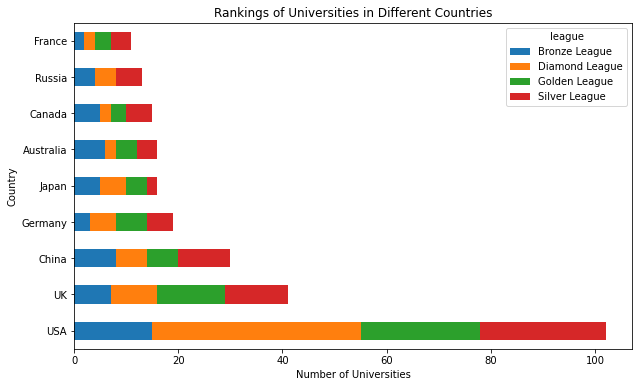

In [572]:
grouped = filtered_df.groupby(['country', 'league'])['university'].count().unstack()
filtered_new = grouped[grouped.sum(axis=1) >=10]
sorted_plot = filtered_new.loc[filtered_new.sum(axis=1).sort_values(ascending=False).index]
ax = sorted_plot.plot.barh(stacked=True, figsize=(10,6))

df_final = pd.crosstab(filtered_df.country, filtered_df.league, values=filtered_df.university, aggfunc=len)[['Bronze League', 'Silver League', 'Golden League', 'Diamond League']].fillna(0)

plt.title("Rankings of Universities in Different Countries")
plt.ylabel("Country")
plt.xlabel("Number of Universities")
plt.show()

In [609]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [614]:
from wordcloud import WordCloud
import requests

In [615]:
url = 'https://math.bme.hu/~pinterj/BevAdat1/Adatok/wordcloud.txt'
response = requests.get(url)

In [619]:
text = response.text
text = text.replace("university", "")
text = text.replace("University", "")
print(text)

The mission of Harvard College is to educate the citizens and citizen-leaders for our society. We do this through our commitment to the transformative power of a liberal arts and sciences education.The mission of the California Institute of Technology is to expand human knowledge and benefit society through research integrated with education. We investigate the most challenging, fundamental problems in science and technology in a singularly collegial, interdisciplinary atmosphere, while educating outstanding students to become creative members of society.The Founding Grant instilled the `s mission with their pioneering spirit. Stanford's mission, they said, was to to qualify its students for personal success, and direct usefulness in life; And its purposes, to promote the public welfare by exercising an influence in behalf of humanity and civilization, teaching the blessings of liberty regulated by law, and inculcating love and reverence for the great principles of government as derive

In [620]:
wordcloud = WordCloud().generate(text)

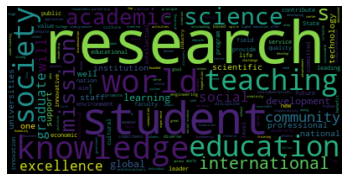

In [622]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#In this word cloud we can see all the words that are used in the mission statements for univerities. 
#The bigger the word, the more often it is used. The biggest word is research, meaning it is the most used word.